In [768]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [769]:
RANDOM_STATE = 42

In [770]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [771]:
train_data_full = pd.read_parquet("/home/henrik/projects/cedas2025/src/data/cedas2025_material/data/chargecurves_train.parquet")

In [772]:
len(train_data_full) / 40

99008.725

In [773]:
train_data_full.loc[train_data_full['id'] == 2]

,id,timestamp,soc,power,nominal_power,location_id,sub_id
40,2,2023-10-13 05:59:50,26.0,0.00,360.0,1,0
41,2,2023-10-13 06:00:50,26.0,66.06,360.0,1,1
42,2,2023-10-13 06:01:50,28.0,66.79,360.0,1,2
43,2,2023-10-13 06:02:50,29.0,67.69,360.0,1,3
44,2,2023-10-13 06:03:50,31.0,68.61,360.0,1,4
45,2,2023-10-13 06:04:50,32.0,70.25,360.0,1,5
46,2,2023-10-13 06:05:50,34.0,71.91,360.0,1,6
47,2,2023-10-13 06:06:50,36.0,73.93,360.0,1,7
48,2,2023-10-13 06:07:50,37.0,75.97,360.0,1,8
49,2,2023-10-13 06:08:50,39.0,76.18,360.0,1,9


In [774]:
def reshape_dataframe(df):
    first_timestamps = df.groupby('id')['timestamp'].first().reset_index()

    pivot_df = df.pivot(index=['id', 'nominal_power', 'location_id'],
                        columns='sub_id',
                        values=['soc', 'power']).reset_index()

    pivot_df.columns = [
        f'{col[0]}_{col[1]}' if col[1] != '' else col[0]
        for col in pivot_df.columns
    ]

    result_df = pivot_df.merge(first_timestamps, on='id')
    return result_df

In [775]:
train_data_full = reshape_dataframe(train_data_full)
len(train_data_full)

99581

In [776]:
train_data_full.head()

,id,nominal_power,location_id,soc_0,soc_1,soc_2,soc_3,soc_4,soc_5,soc_6,soc_7,soc_8,soc_9,soc_10,soc_11,soc_12,soc_13,soc_14,soc_15,soc_16,soc_17,soc_18,soc_19,soc_20,soc_21,soc_22,soc_23,soc_24,soc_25,soc_26,soc_27,soc_28,soc_29,soc_30,soc_31,soc_32,soc_33,soc_34,soc_35,soc_36,soc_37,soc_38,soc_39,power_0,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,power_16,power_17,power_18,power_19,power_20,power_21,power_22,power_23,power_24,power_25,power_26,power_27,power_28,power_29,power_30,power_31,power_32,power_33,power_34,power_35,power_36,power_37,power_38,power_39,timestamp
0,1,62.5,0,42.0,44.0,46.0,49.0,51.0,53.0,55.0,56.0,58.0,60.0,61.0,62.0,64.0,65.0,66.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,76.0,77.0,78.0,79.0,80.0,81.0,81.0,82.0,83.0,83.0,84.0,84.0,85.0,86.0,86.0,86.0,37.73,30.10,27.46,26.42,25.46,23.55,23.63,22.46,20.93,20.18,18.99,19.06,18.29,17.54,17.21,16.41,16.04,15.67,14.90,14.52,13.76,13.38,13.12,12.39,12.79,12.41,11.64,11.26,10.88,10.11,9.72,9.29,8.94,8.91,8.17,7.79,7.36,7.01,7.02,6.63,2023-03-15 09:46:44
1,2,360.0,1,26.0,26.0,28.0,29.0,31.0,32.0,34.0,36.0,37.0,39.0,41.0,42.0,44.0,46.0,48.0,49.0,51.0,53.0,54.0,56.0,58.0,59.0,61.0,62.0,64.0,65.0,67.0,68.0,69.0,71.0,72.0,73.0,75.0,76.0,77.0,78.0,80.0,81.0,82.0,83.0,0.00,66.06,66.79,67.69,68.61,70.25,71.91,73.93,75.97,76.18,76.01,76.96,72.72,74.03,74.97,74.80,73.88,73.32,72.38,70.31,68.60,67.64,67.06,65.70,64.34,63.74,62.76,61.76,61.15,60.14,58.35,57.72,56.16,54.35,54.10,53.06,52.40,51.35,49.10,47.12,2023-10-13 05:59:50
2,3,62.5,2,60.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,68.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,75.0,76.0,77.0,77.0,78.0,80.0,80.0,80.0,80.0,81.0,82.0,82.0,83.0,83.0,83.0,84.0,84.0,85.0,85.0,86.0,86.0,86.0,87.0,33.95,25.42,24.64,24.67,24.68,24.71,24.73,24.69,23.64,22.47,21.80,21.03,21.02,20.99,20.76,20.39,19.69,19.32,18.81,18.19,17.84,17.45,17.00,17.13,16.33,15.88,15.52,15.26,14.83,14.41,14.44,13.64,13.29,12.63,12.61,11.79,11.46,11.07,11.06,10.67,2024-01-23 04:21:08
3,4,50.0,3,59.0,59.0,60.0,61.0,61.0,62.0,63.0,63.0,64.0,64.0,65.0,65.0,66.0,66.0,67.0,67.0,68.0,68.0,69.0,69.0,70.0,70.0,71.0,71.0,71.0,72.0,72.0,72.0,73.0,73.0,73.0,74.0,74.0,74.0,75.0,75.0,75.0,76.0,76.0,76.0,0.00,17.95,13.43,14.66,13.16,12.82,12.85,11.72,11.37,11.40,11.02,10.67,10.67,10.70,11.08,10.70,10.75,10.31,10.37,10.37,9.60,9.98,8.83,8.83,8.79,9.22,8.81,9.24,9.22,9.22,8.83,9.26,8.88,8.86,8.49,6.91,7.30,7.32,7.30,7.70,2023-12-25 10:45:39
4,5,150.0,4,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,19.0,19.0,19.0,20.0,20.0,21.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,34.0,35.0,37.0,38.0,39.0,40.0,42.0,0.37,3.38,3.35,3.35,3.72,3.32,3.35,3.35,3.35,3.35,3.35,4.03,6.37,8.79,11.17,13.81,16.64,19.49,22.26,25.36,28.53,32.01,35.60,39.84,47.25,49.16,58.13,70.96,72.46,71.19,70.62,70.01,69.69,68.74,67.49,67.65,66.82,66.21,65.08,64.36,2022-12-12 18:39:31


In [777]:
train_data_full = train_data_full.drop("timestamp",axis=1) # todo fix this
train_data_full = train_data_full.dropna()
len(train_data_full)

97751

In [778]:
unique_values = train_data_full['location_id'].nunique()
print(unique_values)

306


In [779]:
# remove rows where power_any is over 500
POWER_COLOUMNS_ALL = [f'power_{i}' for i in range(40)]
train_data_true_known = train_data_full[train_data_full[POWER_COLOUMNS_ALL].le(500).all(axis=1)]

In [780]:
# remove rows where soc_0 is 0
train_data_true_known = train_data_true_known[train_data_true_known['soc_0'] != 0]

In [781]:
len(train_data_true_known)

97732

In [782]:
train_data, temp_data = train_test_split(train_data_true_known,
                                         train_size=0.70,
                                         test_size=0.30,
                                         shuffle=True,
                                         random_state=RANDOM_STATE)
validation_data, test_data = train_test_split(temp_data,
                                              train_size=0.5,
                                              test_size=0.5,
                                              random_state=RANDOM_STATE)


In [783]:
SOC_COLOUMNS_SUBSET = [f'soc_{i}' for i in range(10)]
POWER_COLOUMNS_SUBSET = [f'power_{i}' for i in range(10)]

INPUT_FEATURES_CLUSTERING = SOC_COLOUMNS_SUBSET + POWER_COLOUMNS_SUBSET + ["nominal_power","location_id"] # timestamp
# todo location_id should be discrete
# todo add timestamp

TARGET_POWER = [f'power_{i}' for i in range(10, 40)]

In [784]:
# ONLY FIRST 10
train_data_first_ten = train_data[INPUT_FEATURES_CLUSTERING]
validation_data_first_ten = validation_data[INPUT_FEATURES_CLUSTERING]
test_data_first_ten = test_data[INPUT_FEATURES_CLUSTERING]

In [785]:
clustering_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("cluster_model", KMeans(random_state=RANDOM_STATE, n_clusters=15))
])

In [786]:
clustering_pipeline.fit(train_data_first_ten)

Pipeline(steps=[('scaler', StandardScaler()),
                ('cluster_model', KMeans(n_clusters=15, random_state=42))])

In [787]:
labels = clustering_pipeline.named_steps["cluster_model"].labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 15
Estimated number of noise points: 0


In [788]:
# train
train_data_first_ten['cluster'] = labels
train_data['cluster'] = labels

# val
validation_clusters = clustering_pipeline.predict(validation_data_first_ten)
validation_data_first_ten['cluster'] = validation_clusters
validation_data['cluster'] = validation_clusters

# test
test_clusters = clustering_pipeline.predict(test_data_first_ten)
test_data_first_ten['cluster'] = test_clusters
test_data['cluster'] = test_clusters

/tmp/ipykernel_24670/922656606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_first_ten['cluster'] = labels
/tmp/ipykernel_24670/922656606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data_first_ten['cluster'] = validation_clusters
/tmp/ipykernel_24670/922656606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

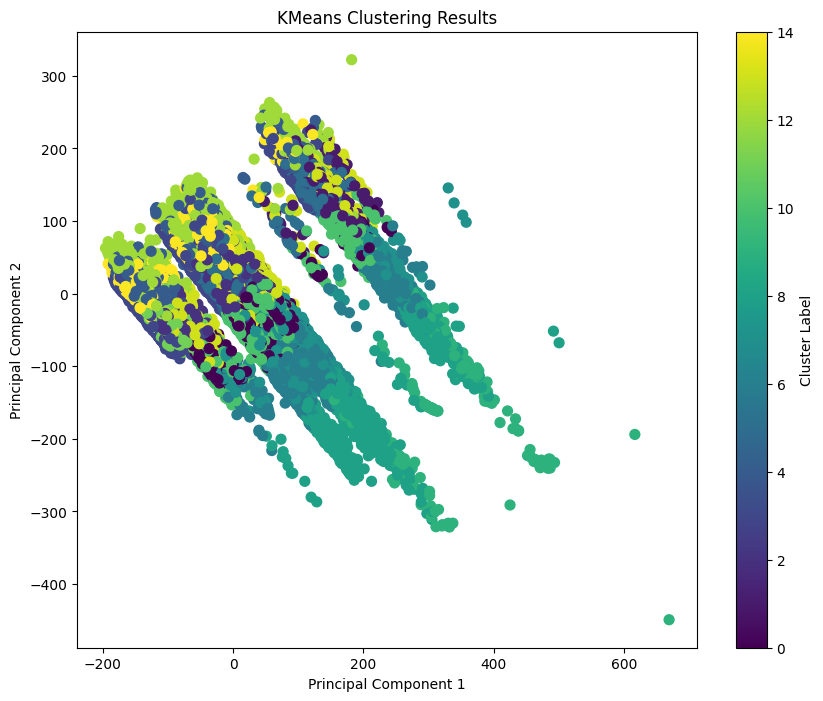

In [789]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(train_data_first_ten)

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [790]:
def plot_mean():
    # Calculate the average SOC and Power for each cluster by taking the mean across all time steps
    cluster_avg_soc = train_data_first_ten.groupby('cluster')[SOC_COLOUMNS_SUBSET].mean().mean(axis=1)
    cluster_avg_power = train_data_first_ten.groupby('cluster')[POWER_COLOUMNS_SUBSET].mean().mean(axis=1)

    # Create a figure with two subplots: one for SOC and one for Power
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Bar chart for average SOC
    axes[0].bar(cluster_avg_soc.index, cluster_avg_soc.values, color='b')
    axes[0].set_title('Average SOC per Cluster')
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Average SOC')
    axes[0].grid(True)

    # Bar chart for average Power
    axes[1].bar(cluster_avg_power.index, cluster_avg_power.values, color='r')
    axes[1].set_title('Average Power per Cluster')
    axes[1].set_xlabel('Cluster')
    axes[1].set_ylabel('Average Power')
    axes[1].grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()


In [791]:
def plot_variation():
    # Combine SOC and Power columns for plotting the boxplots
    # First, we will stack the SOC columns and Power columns for each cluster

    # Create a new DataFrame to hold SOC and Power values by cluster
    soc_data = train_data_first_ten.melt(id_vars=['cluster'], value_vars=SOC_COLOUMNS_SUBSET, var_name='SOC_Timestep', value_name='SOC')
    power_data = train_data_first_ten.melt(id_vars=['cluster'], value_vars=POWER_COLOUMNS_SUBSET, var_name='Power_Timestep', value_name='Power')

    # Set up a figure for the boxplot
    plt.figure(figsize=(18, 8))

    # Plot the SOC variation
    plt.subplot(1, 2, 1)
    sns.boxplot(x='cluster', y='SOC', data=soc_data, palette='Blues')
    plt.title('SOC Variation by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('SOC')

    # Plot the Power variation
    plt.subplot(1, 2, 2)
    sns.boxplot(x='cluster', y='Power', data=power_data, palette='Reds')
    plt.title('Power Variation by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Power')

    # Show the plots
    plt.tight_layout()
    plt.show()

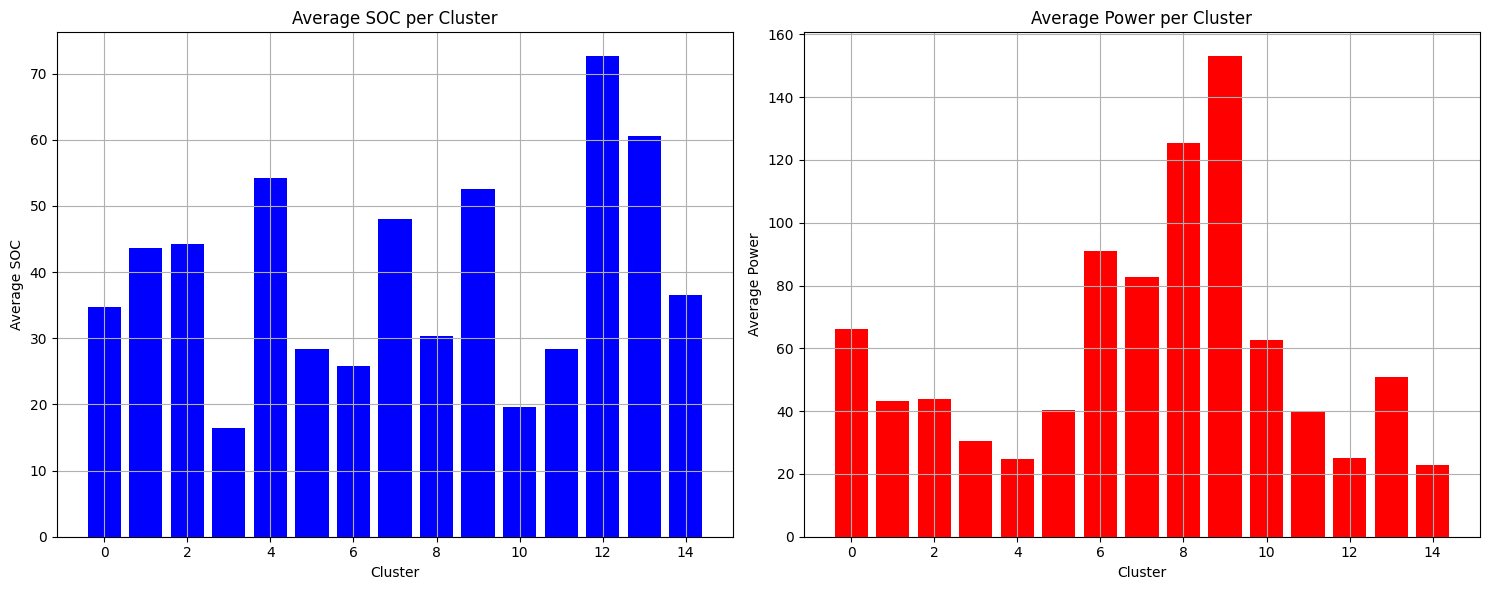

/tmp/ipykernel_24670/3570555530.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='SOC', data=soc_data, palette='Blues')
/tmp/ipykernel_24670/3570555530.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Power', data=power_data, palette='Reds')


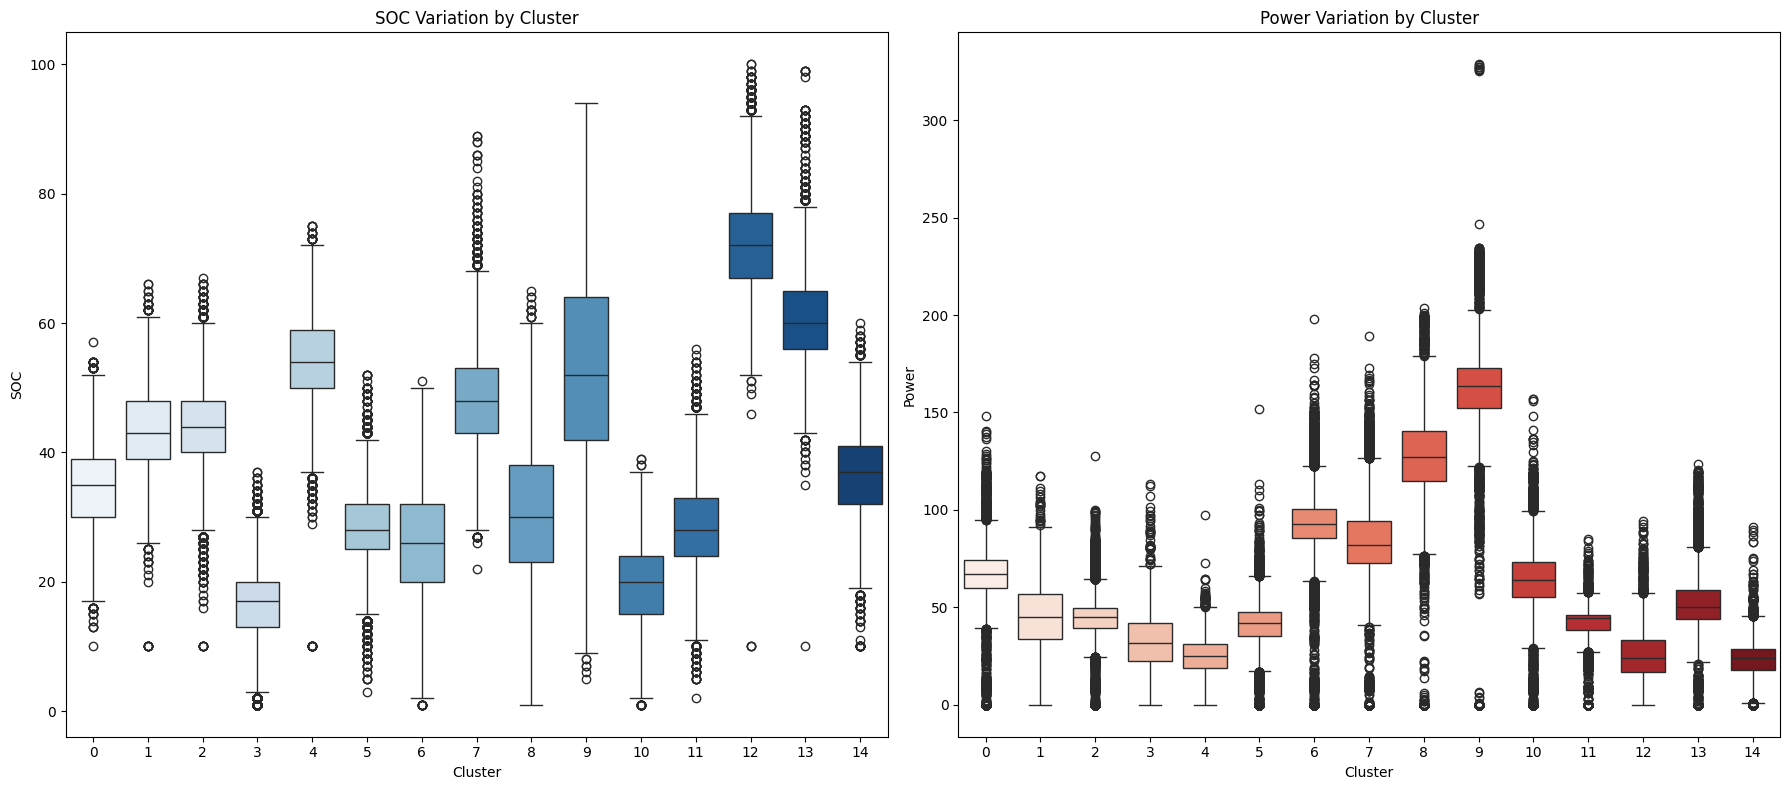

In [792]:
plot_mean()
plot_variation()

In [793]:
def get_model_pipeline():
    return Pipeline([
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures()),
        ('regressor', MultiOutputRegressor(Ridge()))
    ])

In [794]:
INPUT_FEATURES_MODEL = SOC_COLOUMNS_SUBSET + POWER_COLOUMNS_SUBSET + ["nominal_power","location_id"] # timestamp
# todo location_id should be discrete
# todo add timestamp

TARGET_POWER = [f'power_{i}' for i in range(10, 40)]

In [795]:
models_power = {}
for label in range(0, n_clusters_):
    train_subset = train_data[train_data['cluster'] == label]

    X_train_lin = train_subset[INPUT_FEATURES_MODEL]
    y_train_lin_power = train_subset[TARGET_POWER]

    pipeline_model = get_model_pipeline()
    pipeline_model.fit(X_train_lin, y_train_lin_power)
    
    models_power[label] = pipeline_model
    print(f"Trained model for cluster {label} on {len(train_subset)} samples.")


Trained model for cluster 0 on 5522 samples.
Trained model for cluster 1 on 2038 samples.
Trained model for cluster 2 on 8260 samples.
Trained model for cluster 3 on 6295 samples.
Trained model for cluster 4 on 5828 samples.
Trained model for cluster 5 on 5643 samples.
Trained model for cluster 6 on 4101 samples.
Trained model for cluster 7 on 3758 samples.
Trained model for cluster 8 on 2082 samples.
Trained model for cluster 9 on 546 samples.
Trained model for cluster 10 on 4328 samples.
Trained model for cluster 11 on 5279 samples.
Trained model for cluster 12 on 3736 samples.
Trained model for cluster 13 on 5054 samples.
Trained model for cluster 14 on 5942 samples.


In [796]:
validation_scores_power = {}
for cluster, model in models_power.items():
    val_subset = validation_data[validation_data['cluster'] == cluster]

    X_val = val_subset[INPUT_FEATURES_MODEL]
    y_val = val_subset[TARGET_POWER]

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    validation_scores_power[cluster] = mae

    print(f"Cluster {cluster}: MAE = {mae:.3f}")

Cluster 0: MAE = 7.569
Cluster 1: MAE = 6.635
Cluster 2: MAE = 5.216
Cluster 3: MAE = 5.985
Cluster 4: MAE = 3.969
Cluster 5: MAE = 6.046
Cluster 6: MAE = 8.590
Cluster 7: MAE = 6.794
Cluster 8: MAE = 9.982
Cluster 9: MAE = 13.595
Cluster 10: MAE = 9.125
Cluster 11: MAE = 2.996
Cluster 12: MAE = 3.794
Cluster 13: MAE = 5.529
Cluster 14: MAE = 4.706


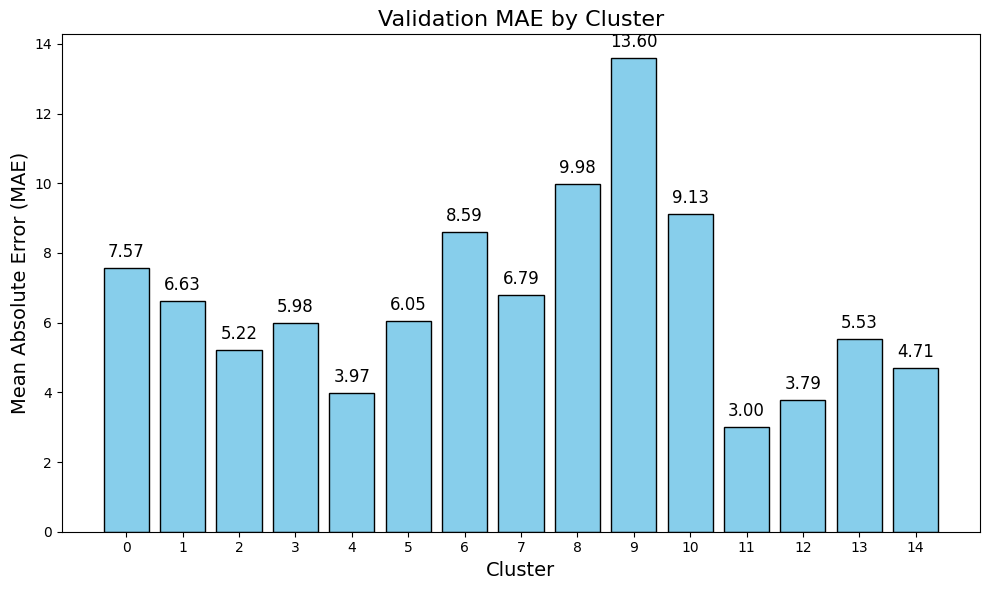

In [797]:
clusters = list(validation_scores_power.keys())
mae_values = list(validation_scores_power.values())

plt.figure(figsize=(10, 6))
plt.bar(clusters, mae_values, color='skyblue', edgecolor='black')
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
plt.title("Validation MAE by Cluster", fontsize=16)
plt.xticks(clusters)

for idx, mae in zip(clusters, mae_values):
    plt.text(idx, mae + 0.2, f"{mae:.2f}", ha="center", va="bottom", fontsize=12)
plt.tight_layout()
plt.show()


In [798]:
total_instances = len(validation_data)
weighted_sum = 0

for cluster, mae in validation_scores_power.items():
    count = len(validation_data[validation_data['cluster'] == cluster])
    weighted_sum += mae * count
    print(f"Cluster {cluster}: instances = {count}, MAE = {mae:.3f}")

weighted_avg_mae = weighted_sum / total_instances
print(f"\nTotal instances in validation data: {total_instances}")
print(f"Weighted Average MAE POWER: {weighted_avg_mae:.3f}")

Cluster 0: instances = 1186, MAE = 7.569
Cluster 1: instances = 439, MAE = 6.635
Cluster 2: instances = 1775, MAE = 5.216
Cluster 3: instances = 1415, MAE = 5.985
Cluster 4: instances = 1203, MAE = 3.969
Cluster 5: instances = 1221, MAE = 6.046
Cluster 6: instances = 944, MAE = 8.590
Cluster 7: instances = 742, MAE = 6.794
Cluster 8: instances = 412, MAE = 9.982
Cluster 9: instances = 116, MAE = 13.595
Cluster 10: instances = 919, MAE = 9.125
Cluster 11: instances = 1185, MAE = 2.996
Cluster 12: instances = 835, MAE = 3.794
Cluster 13: instances = 1103, MAE = 5.529
Cluster 14: instances = 1165, MAE = 4.706

Total instances in validation data: 14660
Weighted Average MAE POWER: 5.955


In [799]:
# SOC IS NEXT
TARGET_SOC = [f'soc_{i}' for i in range(10, 40)]

In [800]:
models_soc = {}
for label in range(0, n_clusters_):
    train_subset = train_data[train_data['cluster'] == label]

    X_train_lin = train_subset[INPUT_FEATURES_MODEL]
    y_train_lin_power = train_subset[TARGET_SOC]

    pipeline_model = get_model_pipeline()
    pipeline_model.fit(X_train_lin, y_train_lin_power)

    models_soc[label] = pipeline_model
    print(f"Trained model for cluster {label} on {len(train_subset)} samples.")


Trained model for cluster 0 on 5522 samples.
Trained model for cluster 1 on 2038 samples.
Trained model for cluster 2 on 8260 samples.
Trained model for cluster 3 on 6295 samples.
Trained model for cluster 4 on 5828 samples.
Trained model for cluster 5 on 5643 samples.
Trained model for cluster 6 on 4101 samples.
Trained model for cluster 7 on 3758 samples.
Trained model for cluster 8 on 2082 samples.
Trained model for cluster 9 on 546 samples.
Trained model for cluster 10 on 4328 samples.
Trained model for cluster 11 on 5279 samples.
Trained model for cluster 12 on 3736 samples.
Trained model for cluster 13 on 5054 samples.
Trained model for cluster 14 on 5942 samples.


In [801]:
validation_scores_soc = {}
for cluster, model in models_soc.items():
    val_subset = validation_data[validation_data['cluster'] == cluster]

    X_val = val_subset[INPUT_FEATURES_MODEL]
    y_val = val_subset[TARGET_SOC]

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    validation_scores_soc[cluster] = mae

    print(f"Cluster {cluster}: MAE = {mae:.3f}")

Cluster 0: MAE = 1.792
Cluster 1: MAE = 1.704
Cluster 2: MAE = 1.750
Cluster 3: MAE = 2.841
Cluster 4: MAE = 1.692
Cluster 5: MAE = 2.227
Cluster 6: MAE = 2.077
Cluster 7: MAE = 1.435
Cluster 8: MAE = 1.970
Cluster 9: MAE = 1.518
Cluster 10: MAE = 2.413
Cluster 11: MAE = 2.012
Cluster 12: MAE = 1.305
Cluster 13: MAE = 1.317
Cluster 14: MAE = 2.316


In [802]:
for cluster, model in models_soc.items():
    val_subset = validation_data[validation_data['cluster'] == cluster]

    X_val = val_subset[INPUT_FEATURES_MODEL]
    y_val = val_subset[TARGET_SOC]

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)

    validation_scores_soc[cluster] = mae

    print(f"Cluster {cluster}: MAE = {mae:.3f}")

Cluster 0: MAE = 1.792
Cluster 1: MAE = 1.704
Cluster 2: MAE = 1.750
Cluster 3: MAE = 2.841
Cluster 4: MAE = 1.692
Cluster 5: MAE = 2.227
Cluster 6: MAE = 2.077
Cluster 7: MAE = 1.435
Cluster 8: MAE = 1.970
Cluster 9: MAE = 1.518
Cluster 10: MAE = 2.413
Cluster 11: MAE = 2.012
Cluster 12: MAE = 1.305
Cluster 13: MAE = 1.317
Cluster 14: MAE = 2.316


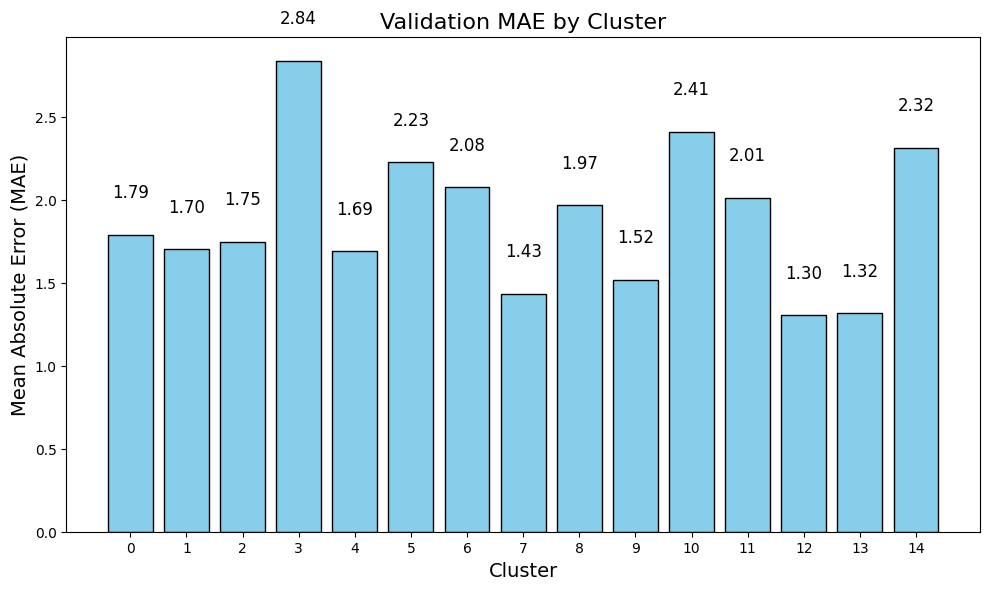

In [803]:
clusters = list(validation_scores_soc.keys())
mae_values = list(validation_scores_soc.values())

plt.figure(figsize=(10, 6))
plt.bar(clusters, mae_values, color='skyblue', edgecolor='black')
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
plt.title("Validation MAE by Cluster", fontsize=16)
plt.xticks(clusters)

for idx, mae in zip(clusters, mae_values):
    plt.text(idx, mae + 0.2, f"{mae:.2f}", ha="center", va="bottom", fontsize=12)
plt.tight_layout()
plt.show()


In [804]:
total_instances = len(validation_data)
weighted_sum = 0

for cluster, mae in validation_scores_soc.items():
    count = len(validation_data[validation_data['cluster'] == cluster])
    weighted_sum += mae * count
    print(f"Cluster {cluster}: instances = {count}, MAE = {mae:.3f}")

weighted_avg_mae = weighted_sum / total_instances
print(f"\nTotal instances in validation data: {total_instances}")
print(f"Weighted Average MAE SOC: {weighted_avg_mae:.3f}")

Cluster 0: instances = 1186, MAE = 1.792
Cluster 1: instances = 439, MAE = 1.704
Cluster 2: instances = 1775, MAE = 1.750
Cluster 3: instances = 1415, MAE = 2.841
Cluster 4: instances = 1203, MAE = 1.692
Cluster 5: instances = 1221, MAE = 2.227
Cluster 6: instances = 944, MAE = 2.077
Cluster 7: instances = 742, MAE = 1.435
Cluster 8: instances = 412, MAE = 1.970
Cluster 9: instances = 116, MAE = 1.518
Cluster 10: instances = 919, MAE = 2.413
Cluster 11: instances = 1185, MAE = 2.012
Cluster 12: instances = 835, MAE = 1.305
Cluster 13: instances = 1103, MAE = 1.317
Cluster 14: instances = 1165, MAE = 2.316

Total instances in validation data: 14660
Weighted Average MAE SOC: 1.952
